In [1]:
import pandas as pd
import numpy as np
import split_scale, wrangle_grades, wrangle, evaluate
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import mean_squared_error as mse
from sklearn.preprocessing import PolynomialFeatures
from math import sqrt

In [2]:
df = wrangle_grades.wrangle_grades()
df.head()

,student_id,exam1,exam2,exam3,final_grade
0,1,100,90,95,96
1,2,98,93,96,95
2,3,85,83,87,87
3,4,83,80,86,85
4,5,93,90,96,97


In [3]:
train, test = split_scale.split_my_data(df, .8)

predictions = pd.DataFrame({'actual': train.final_grade})
predictions.head()

,actual
55,85
24,65
70,81
46,76
100,70


## Exam 1

In [4]:
X = train[['exam1']]
y = train.final_grade

lm = LinearRegression()
lm.fit(X, y)

predictions['exam1_pred'] = lm.predict(X)
predictions.head()

,actual,exam1_pred
55,85,85.123016
24,65,65.570105
70,81,82.114876
46,76,77.602666
100,70,69.330280


## Exam 2

In [5]:
X = train[['exam2']]
y = train.final_grade

lm = LinearRegression().fit(X, y)

predictions['exam2_pred'] = lm.predict(X)
predictions.head()

,actual,exam1_pred,exam2_pred
55,85,85.123016,84.430221
24,65,65.570105,69.793044
70,81,82.114876,74.672103
46,76,77.602666,74.672103
100,70,69.330280,74.672103


In [6]:
mse1 = mse(predictions.actual, predictions.exam1_pred)
mse1

3.5656093295921463

In [7]:
mse2 = mse(predictions.actual, predictions.exam2_pred)
mse2

16.188501494443

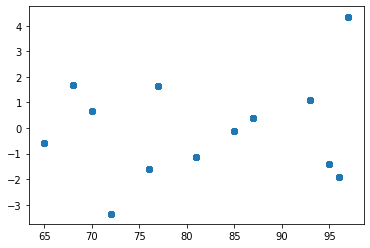

In [8]:
residuals1 = predictions.actual - predictions.exam1_pred
plt.scatter(predictions.actual, residuals1)

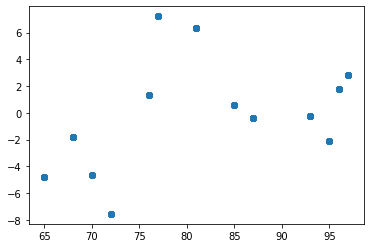

In [9]:
residuals2 = predictions.actual - predictions.exam2_pred
plt.scatter(predictions.actual, residuals2)

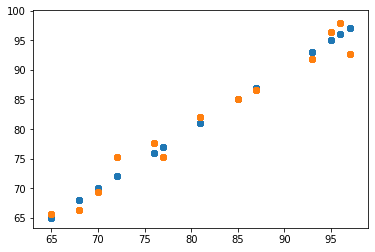

In [10]:
plt.scatter(predictions.actual, predictions.actual)
plt.scatter(predictions.actual, predictions.exam1_pred)

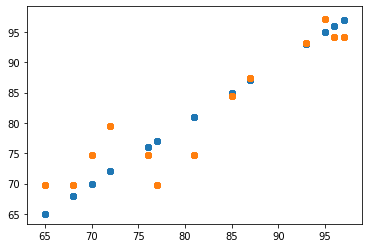

In [11]:
plt.scatter(predictions.actual, predictions.actual)
plt.scatter(predictions.actual, predictions.exam2_pred)

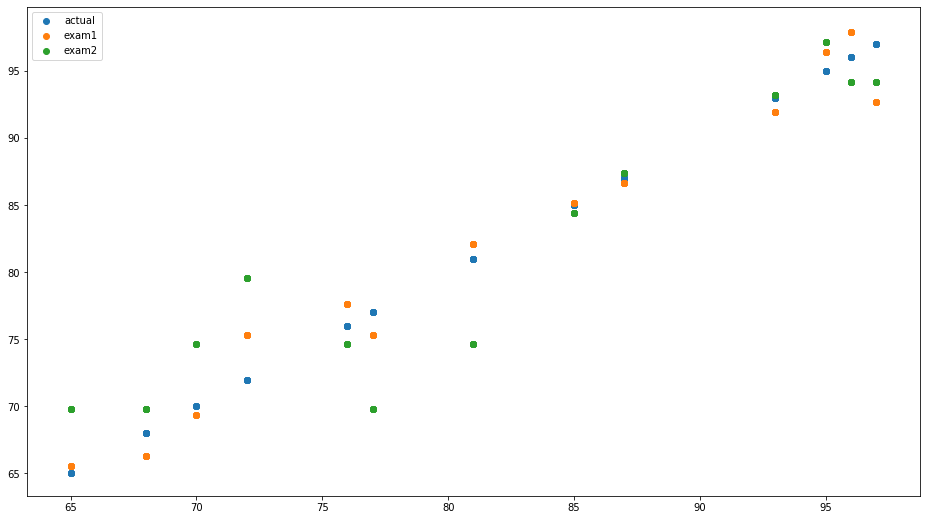

In [12]:
plt.figure(figsize=(16,9))
plt.scatter(predictions.actual, predictions.actual, label='actual')
plt.scatter(predictions.actual, predictions.exam1_pred, label='exam1')
plt.scatter(predictions.actual, predictions.exam2_pred, label='exam2')
plt.legend()

## Exam 1 & 3

In [13]:
X = train[['exam1', 'exam3']]
y = train.final_grade

lm = LinearRegression()
rfe = RFE(lm, 2)
rfe.fit(X, y)

X_rfe = rfe.transform(X)

lm.fit(X_rfe, y)

predictions['exam1&3'] = lm.predict(X_rfe)
predictions.head()

,actual,exam1_pred,exam2_pred,exam1&3
55,85,85.123016,84.430221,84.905090
24,65,65.570105,69.793044,66.585394
70,81,82.114876,74.672103,82.285193
46,76,77.602666,74.672103,75.917988
100,70,69.330280,74.672103,70.648823


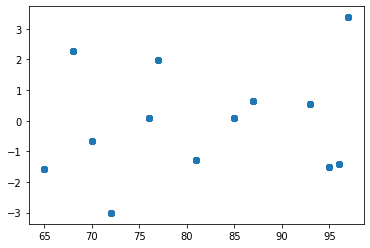

In [14]:
residuals3 = predictions.actual - predictions['exam1&3']
plt.scatter(predictions.actual, residuals3)

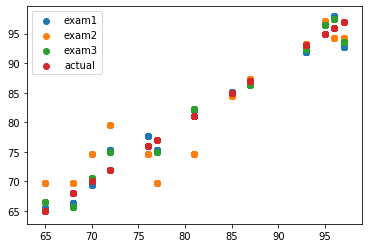

In [15]:
plt.scatter(predictions.actual, predictions.exam1_pred, label='exam1')
plt.scatter(predictions.actual, predictions.exam2_pred, label='exam2')
plt.scatter(predictions.actual, predictions['exam1&3'], label='exam3')
plt.scatter(predictions.actual, predictions.actual, label='actual')
plt.legend()

In [16]:
mse3 = mse(predictions.actual, predictions['exam1&3'])
mse3

2.9992402962160374

In [17]:
mse1, mse2, mse3

(3.5656093295921463, 16.188501494443, 2.9992402962160374)

In [18]:
X = train[['exam1', 'exam3']]
y = train.final_grade

lm = LinearRegression()
lm.fit(X, y)

predictions['exam1_3_lm'] = lm.predict(X)
predictions.head()

,actual,exam1_pred,exam2_pred,exam1&3,exam1_3_lm
55,85,85.123016,84.430221,84.905090,84.905090
24,65,65.570105,69.793044,66.585394,66.585394
70,81,82.114876,74.672103,82.285193,82.285193
46,76,77.602666,74.672103,75.917988,75.917988
100,70,69.330280,74.672103,70.648823,70.648823


In [19]:
X_test = test[['exam1', 'exam3']]
X_test_rfe = rfe.transform(X_test)

test_predictions = lm.predict(X_test_rfe)
test_actual = test.final_grade
mse_final = mse(test_actual, test_predictions)
mse_final

3.267106210745265

In [20]:
sqrt(mse3), sqrt(mse_final)

(1.7318314860909643, 1.8075138203469607)

# Telco churn

In [21]:
df = wrangle.wrangle_telco()
df.drop(columns='customer_id', inplace=True)
df.head()

,monthly_charges,tenure,total_charges
0,109.70,71,7904.25
1,84.65,63,5377.80
2,90.45,65,5957.90
3,45.20,54,2460.55
4,116.80,72,8456.75


In [22]:
train, test = split_scale.split_my_data(df, .8)
train.head()

,monthly_charges,tenure,total_charges
700,66.25,52,3330.10
1341,90.95,66,5930.05
629,93.20,71,6506.15
1034,80.60,70,5460.20
1447,20.05,54,1102.40


In [23]:
# scaler, train_scaled, test_scaled = \
#                 split_scale.min_max_scaler(train, test)
# train_scaled.head()

In [24]:
predictions = pd.DataFrame({'actual': train.total_charges})
predictions.head()

,actual
700,3330.10
1341,5930.05
629,6506.15
1034,5460.20
1447,1102.40


In [25]:
X = train[['tenure']]
y = train.total_charges

lm_tenure = LinearRegression().fit(X, y)

predictions['tenure_pred'] = lm_tenure.predict(X)
predictions.head()

,actual,tenure_pred
700,3330.10,3242.655932
1341,5930.05,4505.938851
629,6506.15,4957.111322
1034,5460.20,4866.876828
1447,1102.40,3423.124921


In [26]:
X = train[['monthly_charges']]
y = train.total_charges

lm_monthly = LinearRegression().fit(X, y)

predictions['monthly_pred'] = lm_monthly.predict(X)
predictions.head()

,actual,tenure_pred,monthly_pred
700,3330.10,3242.655932,4099.343319
1341,5930.05,4505.938851,5836.240388
629,6506.15,4957.111322,5994.459757
1034,5460.20,4866.876828,5108.431292
1447,1102.40,3423.124921,850.572282


In [27]:
X = train[['tenure', 'monthly_charges']]
y = train.total_charges

lm_both = LinearRegression().fit(X, y)

predictions['both_pred'] = lm_both.predict(X)
predictions.head()

,actual,tenure_pred,monthly_pred,both_pred
700,3330.10,3242.655932,4099.343319,3854.070568
1341,5930.05,4505.938851,5836.240388,5946.202829
629,6506.15,4957.111322,5994.459757,6289.990189
1034,5460.20,4866.876828,5108.431292,5475.376142
1447,1102.40,3423.124921,850.572282,1100.240271


In [28]:
pd.options.display.float_format = '{:.3f}'.format

In [29]:
predictions.apply(lambda c: mse(predictions.actual, c))

actual               0.000
tenure_pred    4016707.842
monthly_pred    699968.397
both_pred       239552.800
dtype: float64

In [30]:
X = train[['tenure', 'monthly_charges']]
y = train.total_charges

poly = PolynomialFeatures(degree=2, interaction_only=True, 
                                  include_bias=False).fit(X)
X_poly = pd.DataFrame(poly.transform(X), 
                      columns=poly.get_feature_names(X.columns))

# lm_poly = LinearRegression().fit(X_poly, y)

# predictions['poly'] = lm_poly.predict(X_poly)
# predictions.head()

In [31]:
# predictions['base'] = train.total_charges.mean()
# predictions.head()

In [32]:
# mse1 = mse(predictions.actual, predictions['tenure_pred'])
# mse2 = mse(predictions.actual, predictions['monthly_pred'])
# mse3 = mse(predictions.actual, predictions['both_pred'])
# mse4 = mse(predictions.actual, predictions['poly'])
# mse_base = mse(predictions.actual, predictions['base'])
# mse_list = [mse1, mse2, mse3, mse4, mse_base]
# rmse_list = [sqrt(x) for x in mse_list]
# mse_list

In [33]:
lm = LinearRegression()
rfe = RFE(lm, 1)
rfe.fit(X_poly, y)
X_rfe = pd.DataFrame(rfe.transform(X_poly), 
                     columns=X_poly.columns[rfe.support_])
X_rfe

,tenure monthly_charges
0,3445.000
1,6002.700
2,6617.200
3,5642.000
4,1082.700
...,...
1351,7038.350
1352,1098.900
1353,813.850
1354,304.800


In [43]:
lm = LinearRegression().fit(X_rfe, y)
predictions['poly'] = lm.predict(X_rfe)

In [47]:
predictions.apply(lambda c: mse(predictions.actual, c))

actual               0.000
tenure_pred    4016707.842
monthly_pred    699968.397
both_pred       239552.800
poly              6941.122
dtype: float64

In [51]:
X_test = test[['tenure', 'monthly_charges']]
y_test = test.total_charges

# Using the existing poly, rfe, and lm objects
X_test_poly = poly.transform(X_test)
X_test_rfe = rfe.transform(X_test_poly)
y_test_predictions = lm.predict(X_test_rfe)

mse(y_test, y_test_predictions)

8059.317069732151